In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
#set up seed for consistancy
torch.manual_seed(1)
batch_size = 64
#get MNIST dataset
data_train = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)
#shuffle the labels for training
shuffled_labels = torch.tensor(np.random.randint(0, 10, (len(data_train)),))
#assign shuffled targets
data_train.targets = shuffled_labels
data_test = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor(),
                                          download=True)
train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(data_test, batch_size=batch_size,
                                         shuffle=False)


In [4]:
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.convolution = nn.Sequential(
            nn.Conv2d(1, 10, 3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(10, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            nn.Linear(16*5*5, 500), 
            nn.ReLU(),
            nn.Linear(500, 250),
            nn.ReLU(),
            nn.Linear(250, 125),
            nn.ReLU(),
            nn.Linear(125, 10)
        )

    def forward(self, x):
        outputs = self.convolution(x)
        return outputs

In [5]:
cnn_model_one = CNN_1().to(device)
#cnn_model_one.to(device)

loss_func = nn.CrossEntropyLoss()
optimizer_sgd = torch.optim.Adam(cnn_model_one.parameters(), lr=0.0001)

In [6]:
def trainModel(model):
    n_correct = 0
    n_samples = 0
    count = 0 
    loss_per_batch = 0
    for i, (inputs, labels) in enumerate(train_loader): 
        count +=1
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer_sgd.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs).to(device)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer_sgd.step()
        loss_per_batch += loss.data

        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        acc = 100.0 * n_correct / n_samples
    loss_per_batch /= count
    return loss_per_batch

def testModel(model):
    n_correct = 0
    n_samples = 0
    count = 0 
    loss_per_batch = 0
    for i, (inputs, labels) in enumerate(test_loader): 
        count +=1
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        labels = labels.to(device)
        # forward + backward + optimize
        outputs = model(inputs).to(device)
        loss = loss_func(outputs, labels)
        loss_per_batch += loss.data

        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        acc = 100.0 * n_correct / n_samples
    loss_per_batch /= count
    return loss_per_batch

Epoch  0 Loss Train  tensor(2.3029) Loss Test tensor(2.3025)
Epoch  1 Loss Train  tensor(2.3027) Loss Test tensor(2.3022)
Epoch  2 Loss Train  tensor(2.3026) Loss Test tensor(2.3012)
Epoch  3 Loss Train  tensor(2.3025) Loss Test tensor(2.2988)
Epoch  4 Loss Train  tensor(2.3022) Loss Test tensor(2.2975)
Epoch  5 Loss Train  tensor(2.3018) Loss Test tensor(2.2934)
Epoch  6 Loss Train  tensor(2.3012) Loss Test tensor(2.2917)
Epoch  7 Loss Train  tensor(2.3004) Loss Test tensor(2.2901)
Epoch  8 Loss Train  tensor(2.2991) Loss Test tensor(2.2915)
Epoch  9 Loss Train  tensor(2.2972) Loss Test tensor(2.2869)
Epoch  10 Loss Train  tensor(2.2950) Loss Test tensor(2.2937)
Epoch  11 Loss Train  tensor(2.2918) Loss Test tensor(2.3012)
Epoch  12 Loss Train  tensor(2.2881) Loss Test tensor(2.2914)
Epoch  13 Loss Train  tensor(2.2840) Loss Test tensor(2.3042)
Epoch  14 Loss Train  tensor(2.2788) Loss Test tensor(2.2941)
Epoch  15 Loss Train  tensor(2.2730) Loss Test tensor(2.3294)
Epoch  16 Loss Tra

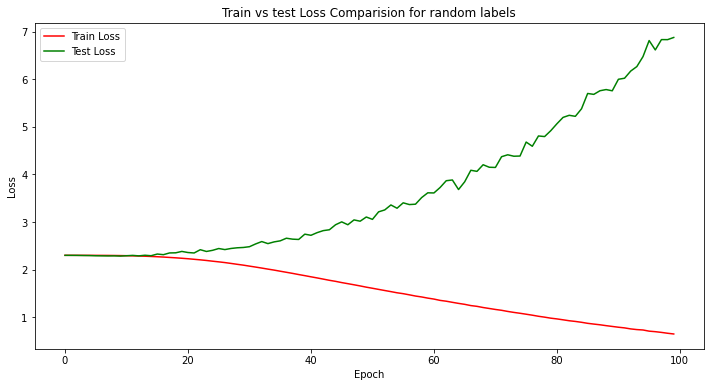

In [7]:
max_epochs = 100
n_loss_train=[]
n_loss_test=[]
for epoch in range(max_epochs):
    loss_train=trainModel(cnn_model_one)
    n_loss_train.append(loss_train)
    loss_test=testModel(cnn_model_one)
    n_loss_test.append(loss_test)
    print('Epoch ', epoch, 'Loss Train ',loss_train ,'Loss Test',loss_test)
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, max_epochs, 1), n_loss_train, color = "r")
plt.plot(np.arange(0, max_epochs, 1), n_loss_test, color = "g")
plt.title('Train vs test Loss Comparision for random labels')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()